In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.electronic_structure import plotter

In [2]:
# télécharger les données de la structure de bande électronique de LiZnAs depuis Materials Project
with MPRester("fuMQt6Cv541dxycfavlOQ02CsLxUQcOm") as m:
    bs = m.get_bandstructure_by_material_id("mp-1011695")

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

La bande interdite a une énergie de 1.7952000000000001 eV


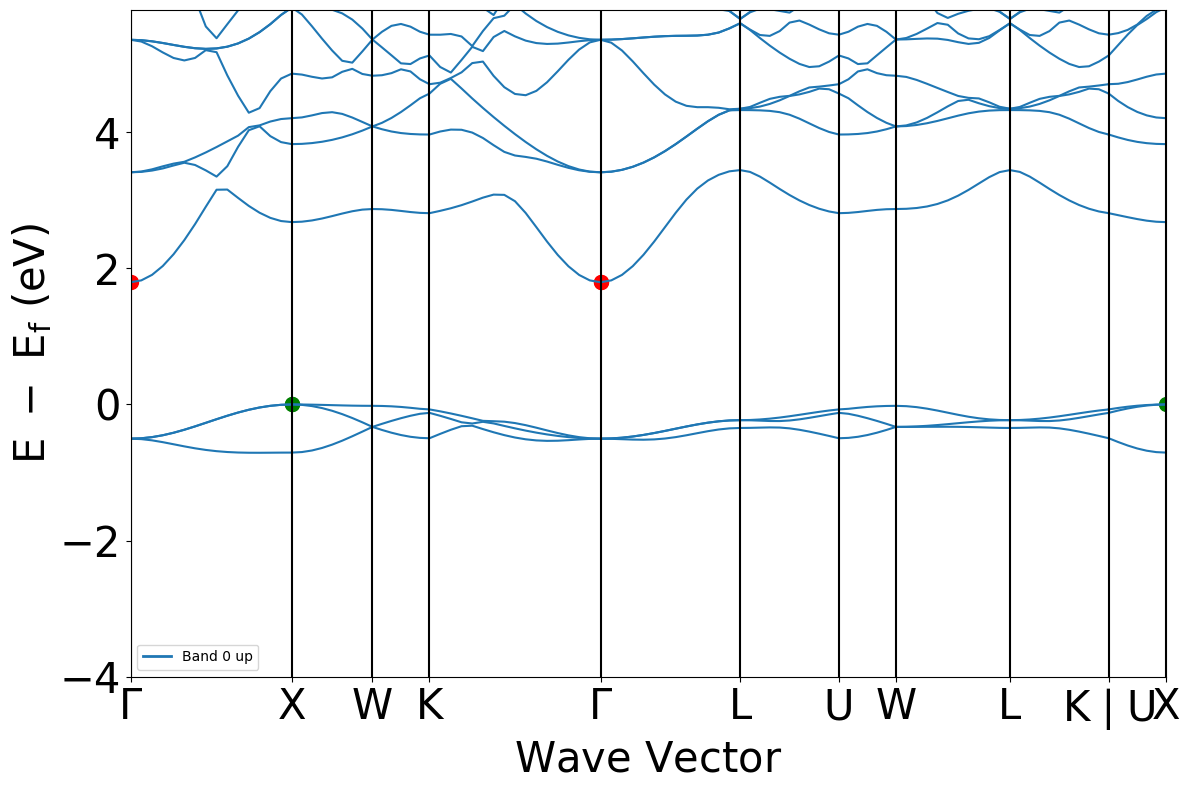

In [3]:
# déterminer la bande interdite
bg = bs.get_band_gap()
print("La bande interdite a une énergie de {} eV".format(bg['energy'])) 
plot = BSPlotter(bs)
plot.get_plot(vbm_cbm_marker=True);

En valeur absolue:
Plus grande dispersion pour la bande de valence:  1.0216221242854604
Plus grande dispersion pour la bande de conduction:  0.8930055038148551
Plus faible dispersion pour la bande de valence:  0.007913870090525955
Plus faible dispersion pour la bande de conduction:  0.1897414175736609


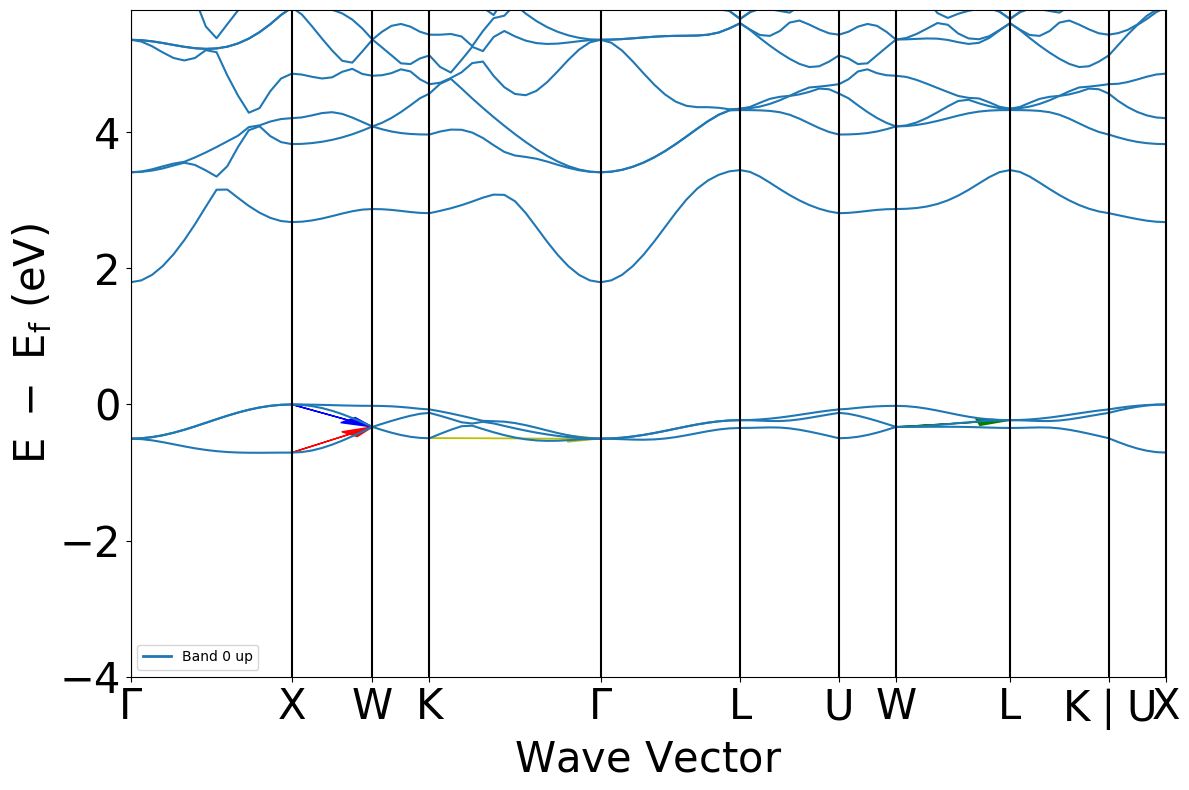

In [4]:
# déterminer la direction
data = plotter.BSPlotter(bs).bs_plot_data()
x = np.unique(data.get('ticks').get('distance'))
y = data.get('energy')

dx = np.zeros(10)
dyc = np.zeros(10)
dyv = np.zeros(10)
mc = np.zeros(10)
mv = np.zeros(10)

for i in range(10):
    dx[i] = x[i+1] - x[i]
for i in range(10):
    dyc[i] =y.get('1')[i][10][-1] - y.get('1')[i][10][0]
    dyv[i] =y.get('1')[i][9][-1] - y.get('1')[i][9][0]   
for i in range (10):
    mc[i] = dyc[i]/dx[i]
    mv[i] = dyv[i]/dx[i] 
    

print("En valeur absolue:")
mxV = np.max(abs(mv))
print("Plus grande dispersion pour la bande de valence: ", mxV)
mxC = np.max(abs(mc))
print("Plus grande dispersion pour la bande de conduction: ", mxC)
mnV = np.min(abs(mv))
print("Plus faible dispersion pour la bande de valence: ", mnV)
mnC = np.min(abs(mc))
print("Plus faible dispersion pour la bande de conduction: ", mnC)

mxVx = np.argmax(abs(mv))
mnVx = np.argmin(abs(mv))
mxCx = np.argmax(abs(mc))
mnCx = np.argmin(abs(mc))

BSPlotter(bs).get_plot()
for X, color, Y, DY in zip([mxVx, mnVx, mxCx, mnCx], ['r', 'y', 'b', 'g'], [9, 9, 10, 10], [dyv, dyv, dyc, dyc]):
    plt.arrow(x[X], (y.get('1')[X][Y])[0], dx[X], DY[X], color=color, head_width = 0.1,length_includes_head=True)

plt.show()

In [5]:
# masse effective au sommet de la dernière bande de valence (disp parab)

hbar = 1.054571818*10**(-34)
eV = 1.602176563*10**(-19)
A = 10**(-10)

#Récupération des données du maximum de la dernière bande de valence
VBM = bs.get_vbm()

#Récupération du vecteur d'onde associé en coordonnées factionnelles
kpoint = VBM.get('kpoint').frac_coords

#Calcul de la norme
k = np.linalg.norm(kpoint)

print('La valeur de la norme est ' + str(k))

#Norme de a
a = 4.227421

#Norme de G
G = 2*np.pi/a

#E associée au VBM
E = VBM['energy']

#Masse effective
m_e = hbar**2*G**2/(2*E)
print('La masse effective du sommet de la dernière bande de valence est ' + str(m_e) + ' kg')

La valeur de la norme est 0.7071067811865476
La masse effective du sommet de la dernière bande de valence est 2.230975780044754e-68 kg


In [6]:
# masse effective à la base de la première bande de conduction (disp parab)

#Récupération des données du minimum de la première bande de conduction
CBM = bs.get_cbm()

#Récupération du vecteur d'onde associé en coordonnées factionnelles
kpoint_CBM = CBM.get('kpoint').frac_coords

#Calcul de la norme
k_CBM = np.linalg.norm(kpoint_CBM)

print('La valeur de la norme est ' + str(k_CBM))

#E associée au CBM
E_CBM = CBM['energy']

#Masse effective
m_e_CBM = hbar**2*k_CBM**2/(2*E_CBM)

print('La masse effective de la base de la première bande de conduction est ' + str(m_e_CBM) + ' kg')

La valeur de la norme est 0.0
La masse effective de la base de la première bande de conduction est 0.0 kg
